In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('haberman.csv')

In [4]:
data

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
5,33,60,0,1
6,34,59,0,2
7,34,66,9,2
8,34,58,30,1
9,34,60,1,1


In [6]:
data.shape

(305, 4)

In [10]:
data.columns

Index(['30', '64', '1', '1.1'], dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
30     305 non-null int64
64     305 non-null int64
1      305 non-null int64
1.1    305 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [12]:
data.describe()

,30,64,1,1.1
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [29]:
data['1.1'].value_counts()

1    224
2     81
Name: 1.1, dtype: int64

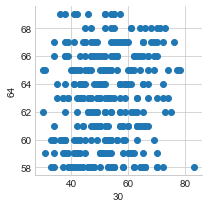

In [16]:
sns.set_style('whitegrid')
sns.FacetGrid(data).map(plt.scatter,'30','64')

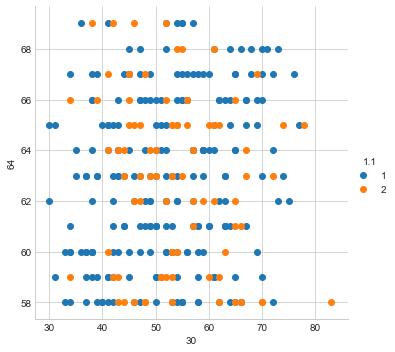

In [19]:
sns.FacetGrid(data, hue = '1.1',size = 5).map(plt.scatter,'30','64').add_legend()

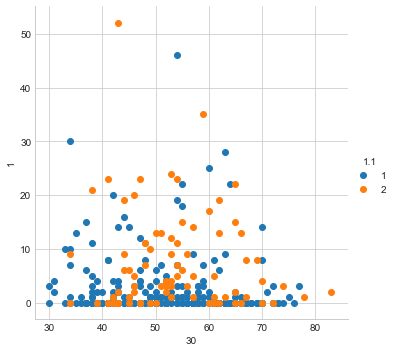

In [20]:
sns.FacetGrid(data, hue = '1.1',size = 5).map(plt.scatter,'30','1').add_legend()

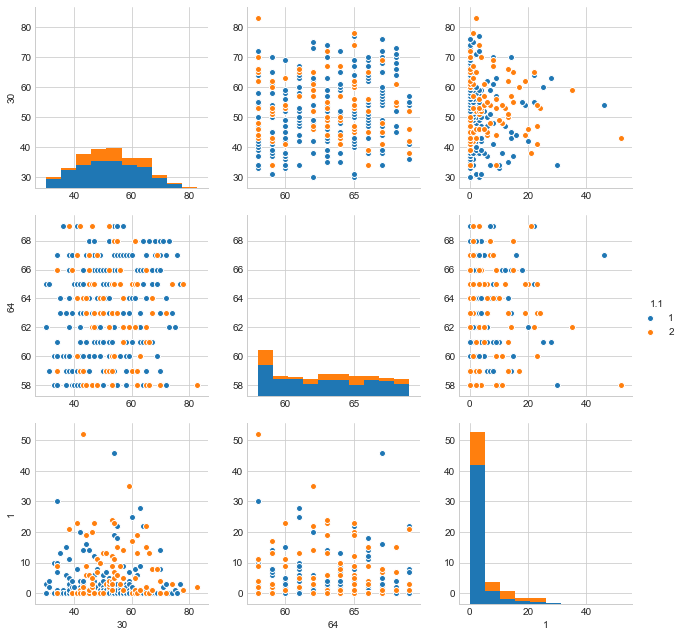

In [24]:
sns.pairplot(data, hue = '1.1',size = 3, vars = ['30','64','1'])

In [26]:
data_1 = data.loc[data['1.1'] == 1]
data_2 = data.loc[data['1.1'] == 2]

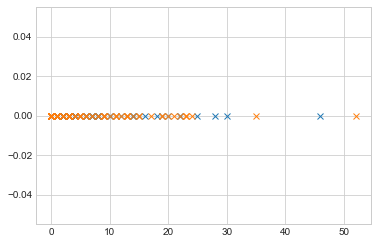

In [27]:
plt.plot(data_1['1'],np.zeros_like(data_1['1']),'x')
plt.plot(data_2['1'],np.zeros_like(data_2['1']),'x')

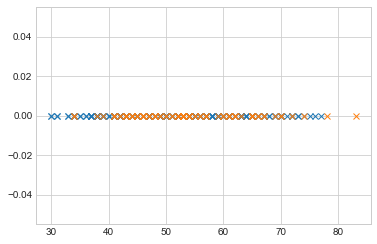

In [30]:
plt.plot(data_1['30'],np.zeros_like(data_1['30']),'x')
plt.plot(data_2['30'],np.zeros_like(data_2['30']),'x')

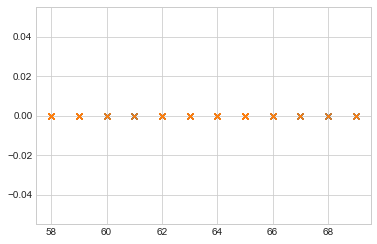

In [31]:
plt.plot(data_1['64'],np.zeros_like(data_1['64']),'x')
plt.plot(data_2['64'],np.zeros_like(data_2['64']),'x') 

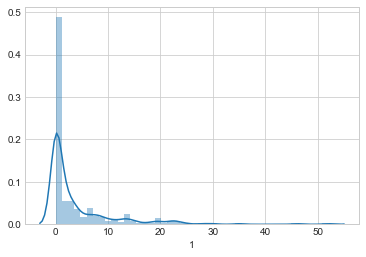

In [33]:
sns.distplot(data['1'])

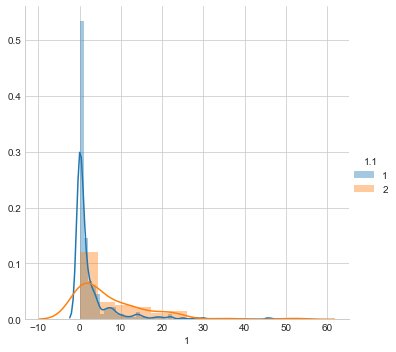

In [36]:
sns.FacetGrid(data, hue = '1.1',size = 5).map(sns.distplot, '1').add_legend()

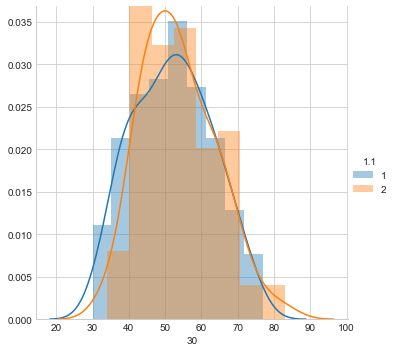

In [37]:
sns.FacetGrid(data, hue = '1.1',size = 5).map(sns.distplot, '30').add_legend()

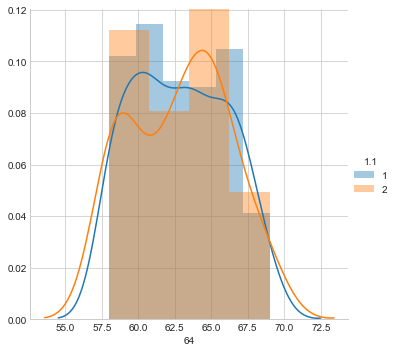

In [38]:
sns.FacetGrid(data, hue = '1.1',size = 5).map(sns.distplot, '64').add_legend()

In [40]:
hist, bin_edges = np.histogram(data_1['1'], bins=10, density = True)
print(hist)
print(bin_edges)

[ 0.18148292  0.01746894  0.00485248  0.00582298  0.00388199  0.0009705
  0.00194099  0.          0.          0.0009705 ]
[  0.    4.6   9.2  13.8  18.4  23.   27.6  32.2  36.8  41.4  46. ]


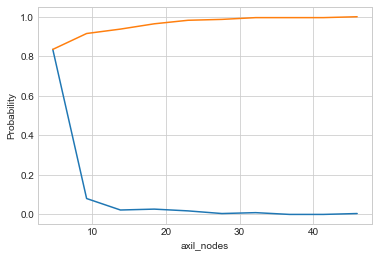

In [46]:
pdf = hist/(sum(hist))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1: ],pdf);
plt.plot(bin_edges[1: ], cdf)
plt.xlabel("axil_nodes")
plt.ylabel("Probability")
plt.grid(True)

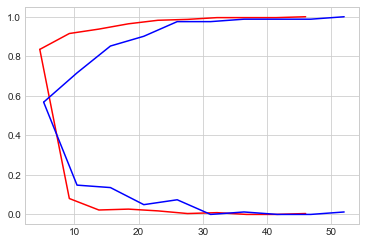

In [49]:
hist, bin_edges = np.histogram(data_1['1'], bins=10, density = True)
pdf = hist/(sum(hist))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1: ],pdf, 'r')
plt.plot(bin_edges[1: ], cdf,'r')


hist, bin_edges = np.histogram(data_2['1'], bins=10, density = True)
pdf = hist/(sum(hist))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1: ],pdf, 'b');
plt.plot(bin_edges[1: ], cdf, 'b')

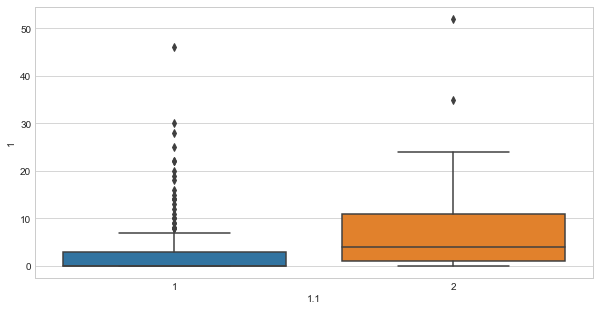

In [50]:
fig = plt.figure(figsize = (10, 5))
sns.boxplot(x='1.1', y='1', data=data)